In [1]:
import numpy as np
from PIL import Image
import random
from tqdm import tqdm
import copy
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
class Abeille():
    
    def __init__(self, x, y):
        self.mort = False
        self.intensite = 0
        self.x = x
        self.y = y
        self.numr = -1
        
    def change_intensite(self, intensite):
        self.intensite = intensite 
        
    def deplacer(self, x, y):
        self.x = x
        self.y = y
        
# Abeille(1,2)
    

In [3]:
class Cellule_Abeille():
    
    def __init__(self):
        self.intensite = 0.0
        self.adequation = 0.0
        self.concentration = 0.0
        self.ab = False
        self.x = 0.0
        self.y = 0.0
        
    def change_intensite(self, intensite):
        self.intensite = intensite
        
    def change_adequation(self, adequation):
        self.adequation = adequation
        
    def change_concentration(self, concentration):
        self.concentration = concentration
        
# Cellule_Abeille()

In [4]:
class Region():
    
    def __init__(self, _type):
        self.liste_de_cellule = []
        self._type = _type
        
    def ajoute_cellule(self, x, y):
        self.liste_de_cellule.append([x, y])
        
    def supprime_cellule(self, x, y):
        self.liste_de_cellule.remove([x, y])
        
    def change_type(self, _type):
        self._type = _type 

    def get_frontiere(self):
        front = []
        for cell in self.liste_de_cellule:
            if [cell[0], cell[1] + 1] not in self.liste_de_cellule:
                front.append(cell)
            elif [cell[0], cell[1] - 1] not in self.liste_de_cellule:
                front.append(cell)
            elif [cell[0] + 1, cell[1]] not in self.liste_de_cellule:
                front.append(cell)
            elif [cell[0] - 1, cell[1]] not in self.liste_de_cellule:
                front.append(cell)
        
        return front
    
    def region_voisinage(self):
        r = []
        front = get_frontiere()
        for c in front:
            if [c[0], c[1] + 1] not in self.liste_de_cellule:
                r.append([c[0], c[1] + 1])
            elif [c[0], c[1] - 1] not in self.liste_de_cellule:
                r.append([c[0], c[1] + 1])
            elif [c[0] + 1, c[1]] not in self.liste_de_cellule:
                r.append([c[0], c[1] + 1])
            elif [c[0] - 1, c[1]] not in self.liste_de_cellule:
                r.append([c[0], c[1] + 1]) 
        
        return r

    
# Region('marquee')

In [37]:
class Environnement_Abeille():
    
    def __init__(self, ENV_SIZE = 64):
        self.abeilles = []#np.zeros(0, dtype = Abeille)
        self.environnement = []#np.zeros((ENV_SIZE, ENV_SIZE), dtype = Cellule_Abeille())
#         [[None for i in range(ENV_SIZE)] for i in range(ENV_SIZE)]
#         self.r_propag.liste_de_cellule = np.zeros(0, dtype = Cellule_Abeille)
#         self.r_propag._type = 'propagation'

# 三种类型的region的顺序一一对应
        self.r_propag = []#np.zeros(0, dtype = Region())# 一个Region集合
        self.r_marq = []#np.zeros(0, dtype = Region())# 一个Region集合
        self.r_voisin = []#np.zeros(0, dtype = Region())# 一个Region集合
#         self.r_marq.liste_de_cellule = np.zeros(0, dtype = Cellule_Abeille)
#         self.r_marq._type = 'marquee'
#         self.r_voisin.liste_de_cellule = np.zeros(0, dtype = Cellule_Abeille)
#         self.r_voisin._type = 'voisinage'
        
#     重置环境
    def reset_env(self, ENV_SIZE = 64):
        
        for i in range(ENV_SIZE):
            env = []
            for j in range(ENV_SIZE):
                env.append(Cellule_Abeille())
            self.environnement.append(env)
            
        nb_ab = int(ENV_SIZE * 5 / 6)
        for i in range(nb_ab):
            x, y = random.randint(0, ENV_SIZE - 1), random.randint(0, ENV_SIZE - 1)
#             print(x, y)
            while self.environnement[x][y].ab == True:
                x, y = random.randint(0, ENV_SIZE - 1), random.randint(0, ENV_SIZE - 1)
            
            self.abeilles.append(Abeille(x, y))
            self.environnement[x][y].ab = True
            
        self.r_propag = []#np.zeros(0, dtype = Region())# 一个Region集合
        self.r_marq = []#np.zeros(0, dtype = Region())# 一个Region集合
        self.r_voisin = []#np.zeros(0, dtype = Region())# 一个Region集合
    
    def region_voisinage(self):
        rvoisins = []
        for r in self.r_marq:
            reg = []
            front = r.get_frontiere()
            for cell in front:
                for c in front:
                    if [c[0], c[1] + 1] not in r.liste_de_cellule and c[1] + 1 != ENV_SIZE:
                        reg.append([c[0], c[1] + 1])
                    elif [c[0], c[1] - 1] not in r.liste_de_cellule and c[1] - 1 != -1:
                        reg.append([c[0], c[1] - 1])
                    elif [c[0] + 1, c[1]] not in r.liste_de_cellule and c[0] + 1 != ENV_SIZE:
                        reg.append([c[0] + 1, c[1]])
                    elif [c[0] - 1, c[1]] not in r.liste_de_cellule and c[0] - 1 != -1:
                        reg.append([c[0] - 1, c[1]]) 
#             print(reg)
            temp = []
            [temp.append(pos) for pos in reg if not pos in temp]
            reg = copy.copy(temp)
            rv = Region('voisinage')
            rv.liste_de_cellule = reg
#             print('reg')
#             print(reg)
            rvoisins.append(rv)
            
        self.r_voisin = rvoisins
#         for coord in self.r_marq.region_voisinage_coord():
#             self.r_voisin.liste_de_cellule.append(self.environnement[coord])
    
    
    def load_environnement(self, path, filename):
#         
        img = Image.open(path + "/" + filename)
        image = img.resize((ENV_SIZE, ENV_SIZE), Image.ANTIALIAS)
        image = image.convert('L')
        image = np.asarray(image)
        avgintens = np.mean(image)
        for i in range(ENV_SIZE):
            for j in range(ENV_SIZE):
                self.environnement[i][j].intensite = image[i, j]
        
        i = 0
        for a in self.abeilles:
            a.intensite = self.environnement[a.x][a.y].intensite
            a.numr = i
            r = Region('marquee')
            r.liste_de_cellule.append([a.x,a.y])
            self.r_marq.append(r)
            i += 1
            
        self.region_voisinage()
#         print(len(self.r_voisin))
        self.evaluation_adequation()
        self.creation_r_propag(avgintens)
#         print(len(self.r_propag))
        self.evaluation_conc()
        self.update_abeille()
        
        return avgintens
    
    def region_marquee(self):
        for a in self.abeilles:
            self.r_marq[a.numr].liste_de_cellule.append([a.x, a.y])


    def ajoute_region(self, region):
        if region._type == 'voisinage':
            self.r_voisin.append(region)
        elif region._type == 'propagation':
            self.r_propag.append(region)
        elif region._type == 'marquee':
            self.r_marq.append(region)
        
    def check_mort(self):
        mort = []
        for ab in self.abeilles:
            m = 8
            for r in self.r_marq:
                if [ab.x, ab.y + 1] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x, ab.y - 1] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x + 1, ab.y] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x - 1, ab.y] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x - 1, ab.y - 1] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x - 1, ab.y + 1] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x + 1, ab.y + 1] not in r.liste_de_cellule:
                    m -= 1
                if [ab.x + 1, ab.y - 1] not in r.liste_de_cellule:
                    m -= 1
             
            if m == 0:
                mort.append(ab)
                
        return mort


    def ajoute_abeille(self):
        pos = []
        for r in self.r_propag:
            pos += r.liste_de_cellule
        
        mort = []
        newab = [-1, -1]
        mort.append(newab)
        while newab in mort:
            newabidx = random.randint(0, len(pos))
#             print(newabidx,len(pos))
            newab = pos[newabidx]
            self.abeilles.append(Abeille(newab))
            mort = self.check_mort()
            self.abeilles.remove(Abeille(newab))
        
        newagent = Abeille(pos[newabidx][0],pos[newabidx][1])
#         self.abeilles.append(Abeille(pos[newabidx][0],pos[newabidx][1]))
        self.environnement[pos[newabidx][0]][pos[newabidx][1]].ab = True
        for i in range(len(self.r_propag)):
            if [pos[newabidx][0], pos[newabidx][1]] in self.r_propag[i]:
                newagent.numr = i
        self.abeilles.append(newagent)
        
    def update_abeille(self):
#         删掉死的
        mort = self.check_mort()
#         print(len(mort))
        for ab in mort:
            self.abeilles.remove(ab)
#             生成新的
        for _ in range(len(mort)):
            self.ajoute_abeille()
        
        
# 计算region voisinage里的cellule上的adequation
    def evaluation_adequation(self, k = 0.5, alpha = 0.5, beta = 0.5):
        
        for r in self.r_voisin:
            somme = 0
            for pos in r.liste_de_cellule:
#                 print(pos)
                somme += self.environnement[pos[0]][pos[1]].intensite# for pos in r
            Ir = somme/len(r.liste_de_cellule)
            
            for pos in r.liste_de_cellule:
                e1 = 1 - min(1, abs(self.environnement[pos[0]][pos[1]].intensite - Ir) / k)
                
                nb_v = 8
                if pos[0] == 0 or pos[0] == ENV_SIZE - 1:
                    nb_v -= 1
                if pos[1] == 0 or pos[1] == ENV_SIZE - 1:
                    nb_v -=1
                
                e2 = nb_v/8
                self.environnement[pos[0]][pos[1]].adequation = alpha * e1 + beta * e2
                
    
    def creation_r_propag(self, avgintens, seuilf = 1):
        
        rpropags = []
        for rv in self.r_voisin:
            rplst = []
            for pos in rv.liste_de_cellule:
                if self.environnement[pos[0]][pos[1]].intensite >= seuilf * avgintens:
                    rplst.append(pos)
            rp = Region('propagation')
            rp.liste_de_cellule = rplst
            rpropags.append(rp)

        self.r_propag = rpropags
        
        
    def fusionner(self, avgintens):
        toFusion = []
        length = len(self.r_propag)
        for i in range(length):
            for j in range(length):
                for c in self.r_propag[i].liste_de_cellule:
                    if c in self.r_propag[j].liste_de_cellule and i != j and [j,i] not in toFusion and [i,j] not in toFusion:
                        toFusion.append([i,j])
#         print(toFusion)
        if len(toFusion) != 0:
            for [i,j] in toFusion:
                c1, c2 = self.r_marq[i].liste_de_cellule[0], self.r_marq[j].liste_de_cellule[0]
                intens = max(self.environnement[c1[0]][c1[1]].intensite, self.environnement[c2[0]][c2[1]].intensite)
                self.r_marq[i].liste_de_cellule += self.r_marq[j].liste_de_cellule
#                 self.r_marq[i].liste_de_cellule = list(set(self.r_marq[i].liste_de_cellule))
                temp = []
                [temp.append(pos) for pos in self.r_marq[i].liste_de_cellule if not pos in temp]
                self.r_marq[i].liste_de_cellule = copy.copy(temp)
                self.r_marq[j].liste_de_cellule = copy.copy(temp)
                for a in self.abeilles:
                    if a.numr == j:
                        a.numr = i
#                 for c in self.r_marq[i].liste_de_cellule:
#                     self.environnement[c[0]][c[1]].intensite = intens
        self.region_voisinage()
        self.creation_r_propag(avgintens)
    
    def evaluation_conc(self):
        
        nr = -1
        for rp in self.r_propag:
            nr += 1
            n = len(rp.liste_de_cellule)
            m = len(self.r_marq[nr].liste_de_cellule)
            for pos in rp.liste_de_cellule:
                self.environnement[pos[0]][pos[1]].concentration = self.environnement[pos[0]][pos[1]].intensite / (m + n)

    
    def choix_cellule(self, agent):
        voisinA = []
        if agent.x == 0 :
            if agent.y == 0:
                voisinA.append([agent.x, agent.y + 1])
                voisinA.append([agent.x + 1, agent.y + 1])
                voisinA.append([agent.x + 1, agent.y])
            elif agent.y == ENV_SIZE - 1:
                voisinA.append([agent.x, agent.y - 1])
                voisinA.append([agent.x + 1, agent.y - 1])
                voisinA.append([agent.x + 1, agent.y])
            else:
                voisinA.append([agent.x, agent.y + 1])
                voisinA.append([agent.x + 1, agent.y + 1])
                voisinA.append([agent.x + 1, agent.y])
                voisinA.append([agent.x, agent.y - 1])
                voisinA.append([agent.x + 1, agent.y - 1])
        elif agent.x == ENV_SIZE - 1:
            if agent.y == 0:
                voisinA.append([agent.x - 1, agent.y])
                voisinA.append([agent.x - 1, agent.y + 1])
                voisinA.append([agent.x, agent.y + 1])
            elif agent.y == ENV_SIZE - 1:
                voisinA.append([agent.x - 1, agent.y])
                voisinA.append([agent.x - 1, agent.y - 1])
                voisinA.append([agent.x, agent.y - 1])
            else:
                voisinA.append([agent.x - 1, agent.y])
                voisinA.append([agent.x - 1, agent.y + 1])
                voisinA.append([agent.x, agent.y + 1])
                voisinA.append([agent.x - 1, agent.y - 1])
                voisinA.append([agent.x, agent.y - 1])
        elif agent.y == 0:
            voisinA.append([agent.x + 1, agent.y + 1])
            voisinA.append([agent.x + 1, agent.y])
            voisinA.append([agent.x - 1, agent.y + 1])
            voisinA.append([agent.x - 1, agent.y])
            voisinA.append([agent.x, agent.y + 1])
        elif agent.y == ENV_SIZE - 1:
            voisinA.append([agent.x + 1, agent.y - 1])
            voisinA.append([agent.x + 1, agent.y])
            voisinA.append([agent.x - 1, agent.y - 1])
            voisinA.append([agent.x - 1, agent.y])
            voisinA.append([agent.x, agent.y - 1])
        else:
            voisinA.append([agent.x - 1, agent.y])
            voisinA.append([agent.x - 1, agent.y + 1])
            voisinA.append([agent.x, agent.y + 1])
            voisinA.append([agent.x - 1, agent.y - 1])
            voisinA.append([agent.x, agent.y - 1])
            voisinA.append([agent.x + 1, agent.y + 1])
            voisinA.append([agent.x + 1, agent.y])
            voisinA.append([agent.x + 1, agent.y - 1])

        sumConc = 0
        for pos in voisinA:
#             print(self.environnement[pos[0]][pos[1]].concentration)
            sumConc += self.environnement[pos[0]][pos[1]].concentration# for pos in voisinA

        probs = []
        if sumConc != 0:
            for pos in voisinA:
                probs.append(self.environnement[pos[0]][pos[1]].concentration / (sumConc * len(voisinA)))
            residx = np.argmax(probs)
            res = voisinA[residx]
        else:
            residx = random.randint(0,len(voisinA) - 1)
            res = voisinA[residx]
        
        
#         print(residx)
        return res
    
    def premier_deplacement(self, avgintens):
        for a in self.abeilles:
            poss = []
            if a.x == 0 :
                if a.y == 0:
                    poss.append([a.x, a.y + 1])
                    poss.append([a.x + 1, a.y + 1])
                    poss.append([a.x + 1, a.y])
                elif a.y == ENV_SIZE - 1:
                    poss.append([a.x, a.y - 1])
                    poss.append([a.x + 1, a.y - 1])
                    poss.append([a.x + 1, a.y])
                else:
                    poss.append([a.x, a.y + 1])
                    poss.append([a.x + 1, a.y + 1])
                    poss.append([a.x + 1, a.y])
                    poss.append([a.x, a.y - 1])
                    poss.append([a.x + 1, a.y - 1])
            elif a.x == ENV_SIZE - 1:
                if a.y == 0:
                    poss.append([a.x - 1, a.y])
                    poss.append([a.x - 1, a.y + 1])
                    poss.append([a.x, a.y + 1])
                elif a.y == ENV_SIZE - 1:
                    poss.append([a.x - 1, a.y])
                    poss.append([a.x - 1, a.y - 1])
                    poss.append([a.x, a.y - 1])
                else:
                    poss.append([a.x - 1, a.y])
                    poss.append([a.x - 1, a.y + 1])
                    poss.append([a.x, a.y + 1])
                    poss.append([a.x - 1, a.y - 1])
                    poss.append([a.x, a.y - 1])
            elif a.y == 0:
                poss.append([a.x + 1, a.y + 1])
                poss.append([a.x + 1, a.y])
                poss.append([a.x - 1, a.y + 1])
                poss.append([a.x - 1, a.y])
                poss.append([a.x, a.y + 1])
            elif a.y == ENV_SIZE - 1:
                poss.append([a.x + 1, a.y - 1])
                poss.append([a.x + 1, a.y])
                poss.append([a.x - 1, a.y - 1])
                poss.append([a.x - 1, a.y])
                poss.append([a.x, a.y - 1])
            else:
                poss.append([a.x - 1, a.y])
                poss.append([a.x - 1, a.y + 1])
                poss.append([a.x, a.y + 1])
                poss.append([a.x - 1, a.y - 1])
                poss.append([a.x, a.y - 1])
                poss.append([a.x + 1, a.y + 1])
                poss.append([a.x + 1, a.y])
                poss.append([a.x + 1, a.y - 1])
                
            num = random.randint(0,len(poss) - 1)
            
            pos = poss[num]
            a.deplacer(pos[0], pos[1])
            a.intensite = self.environnement[pos[0]][pos[1]].intensite
        
        
        self.region_voisinage()
#         print(len(self.r_voisin))
        self.evaluation_adequation()
        self.creation_r_propag(avgintens)
#         print(len(self.r_propag))
        self.fusionner(avgintens)
        self.evaluation_conc()
        self.update_abeille()
    
    def agent_deplacer(self):
        for a in self.abeilles:
            newpos = self.choix_cellule(a)
            a.deplacer(newpos[0], newpos[1])
    
    def update_env(self, avgintens):
#         给region加入新的cellule
#         agent移动到新的位置
        for r in self.r_marq:
            for a in self.abeilles:
                if [a.x,a.y] in r.liste_de_cellule:
                    newpos = self.choix_cellule(a)
                    a.deplacer(newpos[0], newpos[1])
                    a.intensite = self.environnement[newpos[0]][newpos[1]].intensite
#                     r.ajoute_cellule(a.x, a.y)
                    
#         计算新的region propagation
        self.region_marquee()
        self.region_voisinage()
#         print(len(self.r_voisin))
        self.evaluation_adequation()
        self.creation_r_propag(avgintens)
#         print(len(self.r_propag))
        self.fusionner(avgintens)
        self.evaluation_conc()
        self.update_abeille()
        
        for i in range(len(self.r_marq)):
            temp = []
            [temp.append(pos) for pos in self.r_marq[i].liste_de_cellule if not pos in temp]
            self.r_marq[i].liste_de_cellule = copy.copy(temp)
            
        for i in range(len(self.r_propag)):
            temp = []
            [temp.append(pos) for pos in self.r_propag[i].liste_de_cellule if not pos in temp]
            self.r_propag[i].liste_de_cellule = copy.copy(temp)
        
# Environnement_Abeille()

In [38]:
ENV_SIZE = 256
env = Environnement_Abeille()
env.reset_env(ENV_SIZE = 256)
avgintens = env.load_environnement('.','131400.PNG')
env.premier_deplacement(avgintens)

for i in tqdm(range(300)):
    env.update_env(avgintens)
#     print(env.r_marq[1].liste_de_cellule)


100%|█████████████████████████████████████████| 300/300 [14:55<00:00,  2.98s/it]


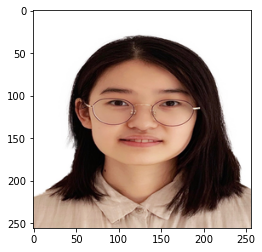

In [39]:
img = Image.open("131400.PNG")
img = img.resize((256,256), Image.ANTIALIAS)
img = np.asarray(img)

plt.imshow(img)
plt.show()

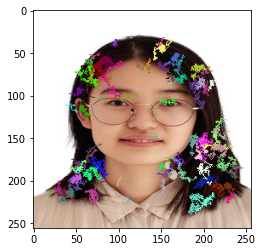

In [40]:
for r in env.r_marq:
    a = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    if len(r.liste_de_cellule) >= 7:
        for c in r.liste_de_cellule:
            img[c[0], c[1], 0] = a
            img[c[0], c[1], 1] = g
            img[c[0], c[1], 2] = b
        
plt.imshow(img)
plt.show()

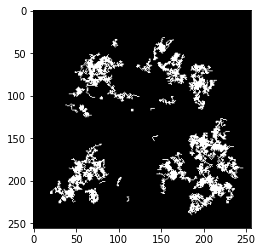

In [41]:
import cv2
import numpy as np

img2 = np.zeros((256,256,3),np.uint8)
for r in env.r_marq:
    if len(r.liste_de_cellule) >= 7:
        for c in r.liste_de_cellule:
            img2[c[0], c[1], 0] = 255
            img2[c[0], c[1], 1] = 255
            img2[c[0], c[1], 2] = 255
plt.imshow(img2)
# cv2.waitKey(0)


In [43]:
ENV_SIZE = 256
env = Environnement_Abeille()
env.reset_env(ENV_SIZE = 256)
avgintens = env.load_environnement('.','131400.jpeg')
env.premier_deplacement(avgintens)

for i in tqdm(range(100)):
    env.update_env(avgintens)
#     print(env.r_marq[1].liste_de_cellule)


100%|█████████████████████████████████████████| 200/200 [05:56<00:00,  1.78s/it]


In [34]:
print(len(env.abeilles))
# print(env.environnement[45][111].ab)
print(env.r_marq[2].liste_de_cellule)
# print(env.r_propag[0].liste_de_cellule)

print(avgintens)

213
[[218, 61], [219, 62], [219, 63], [218, 64], [219, 65], [220, 65], [220, 64], [219, 64], [221, 63], [221, 61], [222, 60], [222, 61], [223, 61], [221, 60], [220, 60], [221, 59], [220, 59], [220, 58], [219, 59], [218, 59], [217, 60], [219, 60], [220, 61], [219, 61], [218, 62], [218, 63], [220, 63], [222, 62], [222, 58], [223, 59], [223, 58], [222, 57], [221, 56], [222, 56], [221, 55], [220, 54], [220, 53], [219, 53], [218, 52], [217, 52], [217, 51], [218, 51], [219, 50], [220, 49], [220, 51], [218, 50], [218, 49], [219, 49], [218, 48], [221, 50], [221, 51], [222, 51], [222, 50], [222, 49], [223, 50], [224, 49], [225, 50], [225, 49], [226, 48], [225, 48], [226, 47], [226, 49], [227, 48], [228, 49], [228, 50], [228, 51], [229, 50]]
157.04617309570312


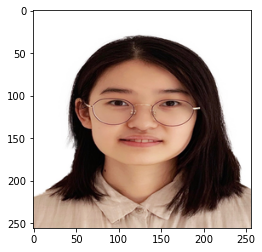

In [35]:
# img = cv2.imread("106000.jpg")[:,:,[2,1,0]]
# plt.imshow(img)
# plt.show()

# img = Image.open("106000.jpg")
img = Image.open("131400.PNG")
img = img.resize((256,256), Image.ANTIALIAS)
img = np.asarray(img)
#img = cv2.imread("106000.jpg", 0)
#plt.imshow(img)
#plt.show()
# M = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.show()

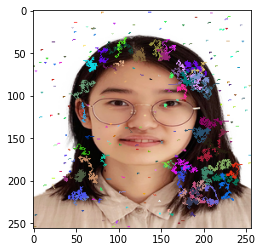

In [36]:
# 300
# 14min
for r in env.r_marq:
    a = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    for c in r.liste_de_cellule:
        img[c[0], c[1], 0] = a
        img[c[0], c[1], 1] = g
        img[c[0], c[1], 2] = b
        
plt.imshow(img)
plt.show()

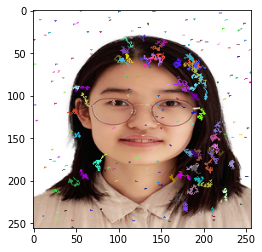

In [32]:
# 100
# 43s
for r in env.r_marq:
    a = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    for c in r.liste_de_cellule:
        img[c[0], c[1], 0] = a
        img[c[0], c[1], 1] = g
        img[c[0], c[1], 2] = b
        
plt.imshow(img)
plt.show()

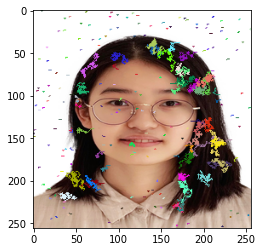

In [28]:
# 200
# 5min56
for r in env.r_marq:
    a = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    for c in r.liste_de_cellule:
        img[c[0], c[1], 0] = a
        img[c[0], c[1], 1] = g
        img[c[0], c[1], 2] = b
        
plt.imshow(img)
plt.show()